In [ ]:
Lecture 14: Carbonates and Poisson-Gamma Age models

In [174]:
nb_list = !jupyter notebook list
server = [l for l in nb_list if 'eos423' in l][0].split(' :: ')[0]
prefix = server.split('?')[0]
token = server.split('?')[1]
notebook = 'Lecture14_CarbPoisson.ipynb'
url = prefix+'notebooks/'+notebook+'?'+token
!decktape -s '1920x1080' rise $url pdf_slides/Lecture14_CarbPoisson.pdf

Loading page http://localhost:8889/notebooks/Lecture14_CarbPoisson.ipynb?token=f8f206edd8eab90c357f93f00242d077c3133c203a7ffef3 ...
actions jupyter-notebook:find-and-replace does not exist, still binding it in case it will be defined later...
load_extensions {
  '0': 'nbextensions_configurator/config_menu/main',
  '1': 'contrib_nbextensions_help_item/main',
  '2': 'rise/main',
  '3': 'jupyter-js-widgets/extension',
  '4': 'jupyter-black-master/jupyter-black',
  '5': 'toc2/main',
  '6': 'hide_code/hide_code',
  '7': 'hide_input/main',
  '8': 'codefolding/main',
  '9': 'splitcell/splitcell'
}
Loaded moment locale en-gb
Failed to load resource: the server responded with a status of 404 (Not Found)
HTML Sanitizer div.style changed {
  change: 'changed',
  tagName: 'div',
  attribName: 'style',
  oldValue: 'background: url(images/coral.jpg) 50% 60% no-repeat;\n' +
    '  width: 75vw;\n' +
    '  height: 30vh; background-size: 100%;',
  newValue: 'background: url("images/coral.jpg") 50% 60% 

Session: kernel_created (1e82e064-6cb3-4947-a44a-735a193478f8)
Starting WebSockets: ws://localhost:8889/api/kernels/89337c7f-8236-4b40-9524-9b1a534ad6ff
Failed to load extension: [ 'nbextensions/hide_code/hide_code' ] {
  requireType: 'scripterror',
  requireModules: [ 'nbextensions/hide_code/hide_code' ],
  originalError: { isTrusted: true }
}
Loading extension: nbextensions_configurator/config_menu/main
Loading extension: contrib_nbextensions_help_item/main
Loading extension: rise/main
Loading extension: hide_input/main
Loading extension: splitcell/splitcell
center
Kernel: kernel_connected (89337c7f-8236-4b40-9524-9b1a534ad6ff)
Loading extension: jupyter-js-widgets/extension
Loading extension: jupyter-black-master/jupyter-black
Failed to load resource: the server responded with a status of 404 (Not Found)
Loading extension: toc2/main
[toc2] Notebook fully loaded -- toc2 initialized 
Widgets are not available.  Please install widgetsnbextension or ipywidgets 4.0
Loading extension: cod

In [19]:
from scipy.linalg import solve_banded
from scipy.interpolate import interp1d
import numpy as np
from tqdm.notebook import tqdm
import matplotlib
from matplotlib import pyplot as plt
from IPython.display import clear_output
import seaborn as sns
import matplotlib.cm as cm
import time

from scipy.linalg import solve_banded
from scipy.interpolate import interp1d
import numpy as np
from tqdm.notebook import tqdm #if you dont have tqdm type in your terminal: conda install -c conda-forge tqdm
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import time
from scipy import signal
from scipy.special import comb

%matplotlib inline


<center><div style="background: url(images/coral.jpg) 50% 60% no-repeat;
  width: 75vw;
  height: 30vh; background-size: 100%;">
</div></center>

# Lecture 14 Carbonates and Age models

<div style='font-size:25px'>  
   
1. Carbon cycle
    1. Carbonate Factories
        1. T vs C vs M
        1. Examples of each
        1. Sedimentation rates and growth potential of each
    1. Geometry of Carbonate Accumulations
    1. Modeling Carbonate Stratigraphy
1. Age model implementations
</div>

<div style='font-size:25px'> <i>We acknowledge and respect the lək̓ʷəŋən peoples on whose traditional territory the university stands and the Songhees, Esquimalt and W̱SÁNE&#262; peoples whose historical relationships with the land continue to this day.</i></div>

<center>
    <div style='height:80vh;'>
	    <img src="images/borabora.jpg" style='height:80vh'>
    </div>
</center>

<center>
    <div style='height:80vh;'>
	    <img src="images/coral.jpg" style='height:80vh'>
    </div>
</center>

<center>
    <div style='height:60vh;'>
	    <img src="images/green_algae.jpg" style='width:100vw'>
    </div>
</center>

<center>
    <div style='height:80vh;'>
	    <img src="images/penicillus.jpg" style='height:80vh'>
    </div>
</center>

<center>
    <div style='height:80vh;'>
	    <img src="images/red_algae.jpg" style='height:80vh'>
    </div>
</center>

<center>
    <div style='height:80vh;'>
	    <img src="images/constructional.jpg" style='height:80vh'>
    </div>
</center>

<center>
    <div style='height:80vh;'>
	    <img src="images/vermetids.jpg" style='height:80vh'>
    </div>
</center>

<center>
    <div style='height:80vh;'>
	    <img src="images/x_section_reef.jpg" style='width:100vw'>
    </div>
</center>

World Reef Map https://maps.lof.org/lof

<center>
    <div style='height:80vh;'>
	    <img src="images/factories.jpg" style='height:80vh'>
    </div>
</center>

<center>
    <div style='height:60vh;'>
	    <img src="images/bryo1.jpg" style='height:60vh'>
    </div>
</center>

<center>
    <div style='height:60vh;'>
	    <img src="images/bryo2.jpg" style='height:60vh'>
    </div>
</center>

<center>
    <div style='height:80vh;'>
	    <img src="images/cool_water.jpg" style='height:80vh'>
    </div>
</center>

<center>
    <div style='height:80vh;'>
	    <img src="images/mudmounds.jpg" style='height:80vh'>
    </div>
</center>

### Lets think a bit more about production rates..

<center>
    <div style='height:80vh;'>
	    <img src="images/growth_curve.jpg" style='height:80vh'>
    </div>
</center>

### Lets think a bit more about production rates..

<center>
    <div style='height:80vh;'>
	    <img src="images/production_depth.jpg" style='height:80vh'>
    </div>
</center>

### Lets think a bit more about production rates..

<center>
    <div style='height:80vh;'>
	    <img src="images/production.jpg" style='height:80vh'>
    </div>
</center>

Text(0, 0.5, 'depth (m)')

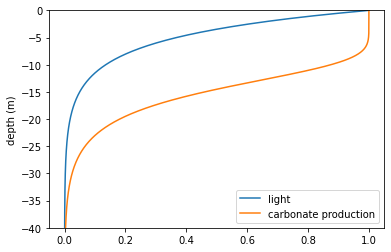

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
dz = np.linspace(0,100,1000)
extinction_coeff = 0.2
light_z = np.exp(-extinction_coeff*dz)
plt.plot(light_z,-dz,label='light')
light_base=.1 #minimum light needed for full capacity
production_capacity = 1 
production_z = production_capacity * np.tanh(light_z/light_base) #tanh gives the smoothing
plt.plot(production_z,-dz,label='carbonate production')
plt.gca().set_ylim([-40,0]); plt.legend(loc='best'); plt.gca().set_ylabel('depth (m)')

In [5]:
def prod_func(z,light_base=0.1,extinction_coeff = 0.2):
    light_z = np.exp(-extinction_coeff*z)
    return np.tanh(light_z/light_base)

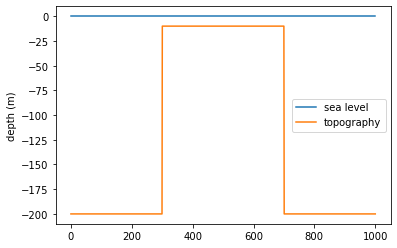

In [6]:
plt.plot([0,1000],[0,0],label='sea level')
dx = np.linspace(0,1000,1000)
topography = np.zeros(1000)-200
topography[dx>300]=-10
topography[dx>700]=-200
plt.plot(dx,topography,label='topography')
plt.gca().set_ylabel('depth (m)');plt.legend(loc='best',fontsize=10) 

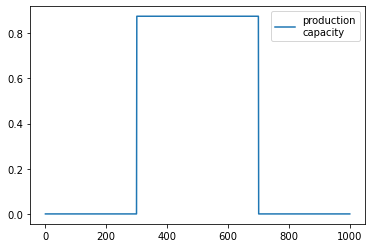

In [7]:
plt.plot(dx,prod_func(-topography),label='production\ncapacity')
plt.legend(loc='best',fontsize=10)

### Now we need to decrease productivity in shallower/restricted water
For each grid point, we want some measure of how much nearby deep water there is..

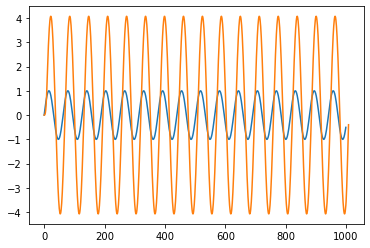

In [15]:
## We will use a convolution for our implementation.. lets take a look at np.convolve
signal = np.sin(np.linspace(0,100,1000))
plt.plot(signal)
plt.plot(np.convolve(signal,signal[:10]))

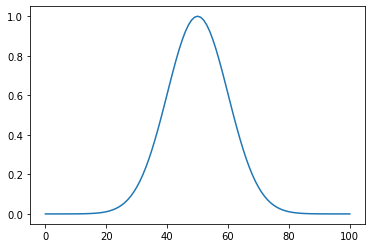

In [9]:
from scipy.signal import gaussian
window_size = 50
standard_deviation = 10
plt.plot(gaussian(1+2*window_size,standard_deviation))

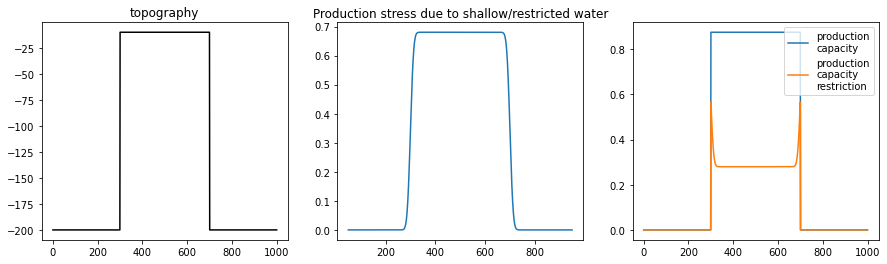

In [59]:
fig=plt.figure(figsize=(15,4))
plt.subplot(1,3,2)
restriction = np.convolve(topography,gaussian(1+2*window_size,standard_deviation),mode='valid')
restriction -= np.min(restriction)
restriction /= 7000 #scaling factor
plt.plot(dx[50:-50],restriction)
plt.gca().set_title('Production stress due to shallow/restricted water')
plt.subplot(1,3,1)
plt.plot(dx,topography,color='k')
plt.gca().set_title('topography')
plt.subplot(1,3,3)
productivity = prod_func(-topography)
plt.plot(dx,productivity,label='production\ncapacity')
productivity[window_size:-window_size]=productivity[window_size:-window_size]*(1-restriction)
plt.plot(dx,productivity,label='production\ncapacity\nrestriction')
plt.legend(loc='upper right',fontsize=10);

In [253]:
r = 1
capacity=2
N=.5
growth_rate = r*N*(1-N/capacity)

In [17]:
class Diffuse1D:
    def __init__(self, length, spacing, tstep, left, right, K, sed_Q, no_flux_boundary=False):
        self.x = np.arange(0, length, spacing)
        self.u = (
            left - self.x * (left - right) / length
        )  # sets initial to steady state solution
        N = self.x.size
        self.K = K
        self.dt = tstep
        self.dx = spacing
        self.time = 0
        self.base_level_fun = interp1d([0, 1], [0, 0], bounds_error=False, fill_value=0)
        self.base_level = self.base_level_fun(self.time)
        self.sed_Q = sed_Q / spacing  # not sure if spacing is correct here
        self.left = left
        self.right = right
        self.r = self.K * (self.dt / (2 * self.dx ** 2))
        self.no_flux_boundary = no_flux_boundary
        
        # initialize matrices A, B and b array
        self.b = np.zeros((N))
        self.b[0] = self.left * 2 * self.r
        self.b[-1] = self.right * 2 * self.r
        self.A = np.zeros((N, N))
        self.B = np.zeros((N, N))

        self.make_B(self.B, self.r)
        self.A, self.A_inv = self.make_A(self.A, self.r)

        self.coastline = 0
        self.Q = np.zeros((N))
        self.update_coastline()
        
        self.window_size = 50
        self.standard_deviation = 10
        self.restriction_window=gaussian(1+2*self.window_size,self.standard_deviation)
        water_depth = self.base_level-self.u
        restriction = np.convolve(-water_depth,self.restriction_window,mode='valid')
        self.restriction_minscale = np.min(restriction)
        
        dz = np.linspace(0,100,1000)
        extinction_coeff = 0.2
        light_z = np.exp(-extinction_coeff*dz)
        light_base=.1
        production_capacity = 1
        production_z = production_capacity * np.tanh(light_z/light_base)
        self.prod_z_fun=interp1d(dz,production_z,bounds_error=False,fill_value=0)
        self.carb_rate = .01


    def make_A(self, A, r):
        l = [-r for i in range(1, A.shape[0] - 2)]
        c = [1 + 2 * r for i in range(A.shape[0] - 2)]
        u = [-r for i in range(A.shape[0] - 3)]
        np.fill_diagonal(A[1:], u)
        np.fill_diagonal(A[:, 1:], l)
        np.fill_diagonal(A, c)
        A_inv = np.linalg.inv(A)
        return A, A_inv

    def make_B(self, B, r):
        l = [r for i in range(1, B.shape[0] - 2)]
        c = [1 - 2 * r for i in range(B.shape[0] - 2)]
        u = [r for i in range(B.shape[0] - 3)]
        np.fill_diagonal(B[1:], u)
        np.fill_diagonal(B[:, 1:], l)
        np.fill_diagonal(B, c)
        return B

    def set_baselevel(self, time, rsl):
        # can pass a set of paired time/rsl and model will interpolate for each dt
        self.base_level_fun = interp1d(time, rsl)
        
    def produce_carb(self):
        water_depth = self.base_level-self.u
        restriction = np.convolve(-water_depth,self.restriction_window,mode='valid')
        restriction -= np.min(restriction)
        restriction /= 6000 #multiply to scale shelf production
        productivity = prod_func(water_depth)
        productivity[window_size:-window_size]=productivity[window_size:-window_size]*(1-restriction)
        productivity[self.u>self.base_level]=0
        self.Q+=self.carb_rate*productivity

    def run_step(self):
        if self.no_flux_boundary:
            self.b[0] = self.u[0] * 2 * self.r
            self.b[-1] = self.u[-1] * 2 * self.r
        #         self.update_K()  # can disable if K is not changing with each t_step (ie as a function of elevation)
        self.Q *= 0  # clearing any old sed flux terms
        self.base_level = self.base_level_fun(self.time)  # update base level
        self.produce_carb()
#         if self.base_level>np.min(self.u):
#             self.update_coastline()  # select coastline point for sed flux
#             self.Q[self.coastline] += self.sed_Q  # add sediment to the coastline
        self.bb = (
            self.B.dot(self.u) + self.b + self.dt * self.Q
        )  # matrix addition
        self.u = self.A_inv.dot(self.bb)
        self.time += self.dt  # increment timestep        

    def update_coastline(self):
        # finds the first grid point below base level starting on the left hand side
        try:
            self.coastline = np.where(self.u < (self.base_level))[0][0]
        except:
            self.coastline = 1


def sawtooth_wave(n, x):
    y = np.zeros_like(x)
    for k in range(1, n + 1):
        y += (comb(2*n, n-k) / comb(2*n, n)) * ( np.sin(k*x) / k )
    return y


def get_strat_column(beds, age, rsl, loc, skip=1):
    facies_limits = [0.5, -0.05, -.5, -1, -2, -2000]
    facies_w = [a for a in [0.8, 0.6, 0.5, 0.4, 0.3, 0.2]]
    facies_c = [
        "#ffb142",  # 
        "#33d9b2",  # 
        "#34ace0",  # 
        "#706fd3",  # 
        "#2c2c54",  # 
        "#84817a",  #
    ]   

    strat = np.array(beds.copy())[::skip][:, loc]
    time_strat = np.array(age.copy())[::skip]
    rsl_strat = np.array(rsl.copy())[::skip]

    for i in range(0, strat.size):
        older = strat[:-i]
        older_rsl = rsl_strat[:-i]
        older[older > strat[-i]] = strat[-i]
        older_rsl[older > strat[-i]] = strat[-i]
        strat[:-i] = older
        rsl_strat[:-i] = older_rsl
        rsl_strat = np.array(rsl.copy())[::skip]

    thicknesses = np.zeros(strat.shape[0])
    heights = np.zeros(strat.shape[0])
    
    water_depths = rsl_strat-strat
    facies = np.zeros(water_depths.size)
    colors = np.zeros(water_depths.size).astype(str)
    water_depths = -1 * water_depths

    for j in range(len(facies_limits) - 1, -1, -1):
        facies[water_depths > facies_limits[j]] = facies_w[j]
        colors[water_depths > facies_limits[j]] = facies_c[j]

        bed_facies = []
        bed_top = []
        bed_colors = []

        changes = np.where(np.diff(facies) != 0)[0]
        for c in [*changes, len(facies) - 1]:
            bed_facies += [facies[c]]
            bed_top += [strat[c]]
            bed_colors += [colors[c]]

        h = np.diff([np.min(strat), *bed_top])
        bed_bottom=bed_top-h
        
    return (np.array(bed_facies).ravel(), 
            np.array(bed_bottom).ravel(), 
            np.array(h).ravel(), 
            np.array(bed_colors).ravel())

def plot_column(bed_facies,bed_bottom,h,bed_colors,left=0):
    plt.figure(figsize=(3,12))
    plt.barh(
        bed_bottom,
        bed_facies,
        height=h,
        left=left,
        color=bed_colors,
        align="edge",
        lw=1,
        edgecolor=(0.2, 0.2, 0.2),zorder=4
    )
    
def animate_beds(beds,otime,rsl, color=True, aspect=10, ymin=-55, ymax=0):
    N = int(len(beds) / 2) + 1
    cs_reg = sns.color_palette("viridis", n_colors=np.sum(np.gradient(rsl) <= 0))
    cs_trans = sns.color_palette("Greys", n_colors=np.sum(np.gradient(rsl) > 0))
    rsl_down = np.gradient(rsl) <= 0
    if color==False:
        cs_reg = sns.color_palette("Greys", n_colors=100*np.sum(np.gradient(rsl) <= 0))
        cs_trans = sns.color_palette("Greys", n_colors=100*np.sum(np.gradient(rsl) > 0))

    sns.set_palette("tab20", n_colors=40)
    
    minima = min(np.gradient(rsl))
    maxima = max(np.gradient(rsl))
    max_max = max([minima,maxima])

    norm = matplotlib.colors.Normalize(vmin=-1*max_max, vmax=max_max, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.seismic)

    # for k in range(len(beds)):
    #         beds[k]-=otime[k]*model.subsidence_r

    beds = np.array(beds)
    for i, bed in enumerate(beds):

        beds_eroded = []

        for k, layer in enumerate(beds[:i]):
            future_min = np.min(beds[k : i + 1], axis=0)
            beds_eroded.append(future_min)
        #         beds_eroded.append(layer)

        beds_eroded.append(beds[i])
        beds_eroded = np.array(beds_eroded)

        fig = plt.figure(figsize=(18, 12))
        clear_output(wait=True)
        c = [0, 0]
        z = N + 1
        last_layer = beds_eroded[0]
        for layer, down in zip(beds_eroded[: i + 1], np.gradient(rsl)):
            if down:
                plt.fill_between(
                    np.arange(layer.size),
                    last_layer,
                    layer,
#                     facecolor=mapper.to_rgba(down),
                    facecolor='white',
                    lw=0.5,
                    edgecolor=(0, 0, 0),
                )
                c[0] += 1
            else:
                plt.fill_between(
                    np.arange(layer.size),
                    last_layer,
                    layer,
#                     facecolor=cs_trans[c[1]],
                    facecolor='white',
                    lw=0.1,
                    edgecolor=(0, 0, 0),
                )
                c[1] += 1
            z -= 1
            last_layer = np.copy(layer)

        plt.plot(bed, color="r", zorder=N * 2 + 1)
        plt.plot([0, 1000], [rsl[i], rsl[i]], "--", color="k")

        plt.gca().set_xlim([0, layer.size])
        plt.gca().set_ylim([ymin, ymax])
        plt.gca().set_aspect(aspect)
        #     plt.gca().set_title('Regression (color) and Transgression (greyscale)\n with Constant Sed Flux (vertical exaggeration: 100)')
        plt.gca().set_title("time=" + str(np.round(otime[i], 2)) + " years")
        plt.gca().set_ylabel("height (m)")
        plt.gca().set_xlabel("distance (10^1 meters)")
        plt.show()
        time.sleep(0.01)
        
def plot_beds(beds,otime,rsl, color=True, aspect=10, ymin=-55, d13c_fun=None,ax=None):
    if ax==None:
        fig = plt.figure(figsize=(18, 12))
        plt.plot([],[])
        ax=plt.gca()
    N = int(len(beds) / 2) + 1
    cs_reg = sns.color_palette("viridis", n_colors=np.sum(np.gradient(rsl) <= 0))
    cs_trans = sns.color_palette("Greys", n_colors=np.sum(np.gradient(rsl) > 0))
    rsl_down = np.gradient(rsl) <= 0
    if color==False:
        cs_reg = sns.color_palette("Greys", n_colors=100*np.sum(np.gradient(rsl) <= 0))
        cs_trans = sns.color_palette("Greys", n_colors=100*np.sum(np.gradient(rsl) > 0))

    sns.set_palette("tab20", n_colors=40)
    
    minima = min(np.gradient(rsl))
    maxima = max(np.gradient(rsl))
    max_max = max([minima,maxima])
    
    if type(d13c_fun)!=type(None):
        norm = matplotlib.colors.Normalize(vmin=np.min(d13c_fun(otime)), vmax=np.max(d13c_fun(otime)), clip=True)
        mapper = cm.ScalarMappable(norm=norm, cmap=cm.viridis)
    else:
        norm = matplotlib.colors.Normalize(vmin=0, vmax=np.max(otime), clip=True)
        mapper = cm.ScalarMappable(norm=norm, cmap=cm.cividis)
    
    if color==False:
        norm = matplotlib.colors.Normalize(vmin=0, vmax=1e10, clip=False)
        mapper = cm.ScalarMappable(norm=norm, cmap=cm.Greys)

    # for k in range(len(beds)):
    #         beds[k]-=otime[k]*model.subsidence_r

    beds = np.array(beds)


    beds_eroded = []

    for k, layer in enumerate(beds):
        future_min = np.min(beds[k :], axis=0)
        beds_eroded.append(future_min)
    #         beds_eroded.append(layer)

    beds_eroded.append(beds[-1])
    beds_eroded = np.array(beds_eroded)

    
    clear_output(wait=True)
    c = [0, 0]
    z = N + 1
    last_layer = beds_eroded[0]
    for layer, time in zip(beds_eroded, otime):
        if type(d13c_fun)!=type(None):
            ax.fill_between(
                np.arange(layer.size),
                last_layer,
                layer,
                facecolor=mapper.to_rgba(d13c_fun(time)),
                lw=0.25,
                edgecolor=(0, 0, 0),
            )
        else:
            ax.fill_between(
                np.arange(layer.size),
                last_layer,
                layer,
                facecolor=mapper.to_rgba(time),
                lw=0.25,
                edgecolor=(0, 0, 0),
            )
        c[0] += 1
        
        z -= 1
        last_layer = np.copy(layer)

    ax.plot(beds[-1], color="r", zorder=N * 2 + 1)
#     plt.plot([0, 1000], [rsl[-1], rsl[i]], "--", color="k")

    ax.set_xlim([0, 400])
    ax.set_ylim([ymin, 0])
    ax.set_aspect(aspect)
    #     plt.gca().set_title('Regression (color) and Transgression (greyscale)\n with Constant Sed Flux (vertical exaggeration: 100)')
    ax.set_title("time=" + str(np.round(otime[-1], 2)) + " years")
    ax.set_ylabel("height (m)")
    ax.set_xlabel("distance (10^1 meters)")
    return ax

In [20]:
dt = 1  # timestep
base_level_rise = 100  # long term subsidence in meters
dx = 10  # x grid spacing
total_time = 3e6  # duration of simulation in years
initial_baselevel = 1  # in meters
sed_Q = 0.0  # sedimentation flux

#create an instance of Diffuse1D (defined above)
model = Diffuse1D(
    length=10000,
    spacing=dx,
    tstep=dt,
    left=0,
    right=0,
    K=2e-2,
    sed_Q=sed_Q,
    no_flux_boundary=True,
)

xt = np.linspace(0, total_time, 10000)  # creating uniform timegrid
RSL1 = -1.5 * np.sin(xt * 2 * np.pi * (1 / 20000))  # cyclic sea level component 1
RSL2 = 1 * sawtooth_wave(5, xt * 2 * np.pi * (1 / 100000))  # cyclic sea level component 2
RSL = (base_level_rise / (total_time) * xt + initial_baselevel)  # cyclic sea level + subsidence
# creates a function in the Diffuse1D model mapping your sea level boundary condition to time
model.set_baselevel(xt, RSL)

Text(0, 0.5, 'Base level')

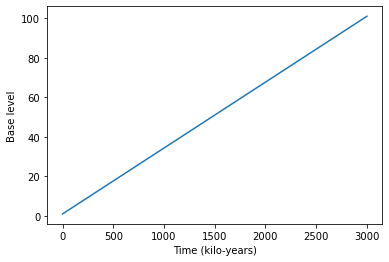

In [21]:
#to plot your model sea level boundary condition
plt.plot(xt/1000,model.base_level_fun(xt))
plt.gca().set_xlabel('Time (kilo-years)')
plt.gca().set_ylabel('Base level')

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

(-50.0, 0.0)

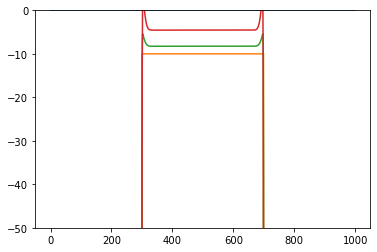

In [22]:
plt.plot(model.u)
model.u=topography
plt.plot(model.u)
for i in tqdm(range(1000)):
    model.run_step()
plt.plot(model.u)

for i in tqdm(range(2000)):
    model.run_step()
plt.plot(model.u)
plt.gca().set_ylim([-50,0])

In [23]:
dt = 10  # timestep
base_level_rise = 60  # long term subsidence in meters
dx = 10  # x grid spacing
total_time = 1e6  # duration of simulation in years
initial_baselevel = 1  # in meters
sed_Q = 0.0  # sedimentation flux

#create an instance of Diffuse1D (defined above)
model = Diffuse1D(
    length=10000,
    spacing=dx,
    tstep=dt,
    left=0,
    right=0,
    K=2e-2,
    sed_Q=sed_Q,
    no_flux_boundary=True,
)

xt = np.linspace(0, total_time, 10000)  # creating uniform timegrid
RSL1 = 2 * np.sin(xt * 2 * np.pi * (1 / 1e5))  # cyclic sea level component 1
RSL = (base_level_rise / (total_time) * xt + initial_baselevel +RSL1)  # cyclic sea level + subsidence
# creates a function in the Diffuse1D model mapping your sea level boundary condition to time
model.set_baselevel(xt, RSL)
model.u=topography
model.carb_rate = .0015

Text(0, 0.5, 'Base level')

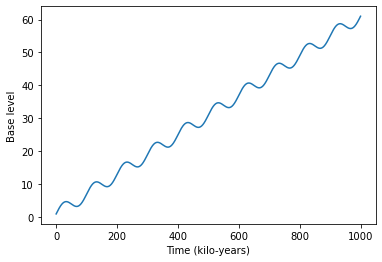

In [24]:
#to plot your model sea level boundary condition
plt.plot(xt/1000,model.base_level_fun(xt))
plt.gca().set_xlabel('Time (kilo-years)')
plt.gca().set_ylabel('Base level')

In [25]:
# initial lists to store model outputs throughout the simulation
beds = [] #model topography
age = [] #model time
rsl = [] #relative (local) sea level
sed_on = True
progress_bar = tqdm(range(int(total_time / dt / 1))) #run the model for the full duration, the tqdm wrapper provides a progress bar
for i in progress_bar:
    model.run_step() #run 1 timestep dt
    if i%50==0: #save every 50 steps to our lists
        beds.append(model.u)
        age.append(model.time)
        rsl.append(model.base_level)

  0%|          | 0/100000 [00:00<?, ?it/s]

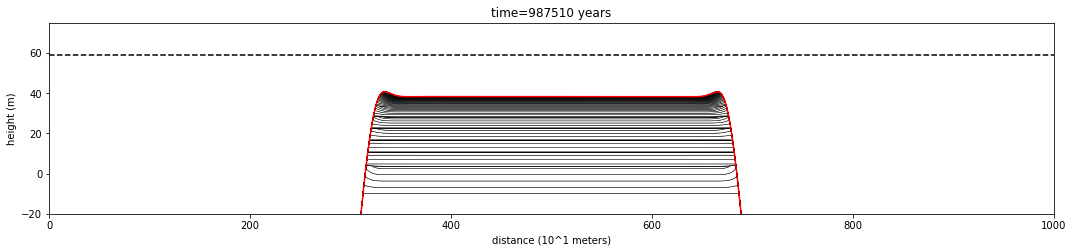

In [27]:
skip=25
animate_beds(beds=beds[::skip],otime=age[::skip],rsl=rsl[::skip],aspect=2, ymin=-20, ymax=75, color=True)

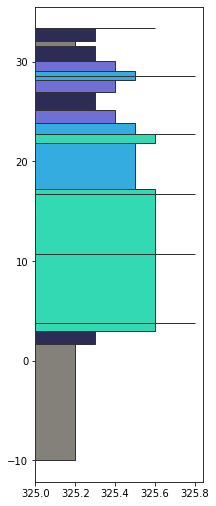

In [85]:
column_number = 325
bed_facies, bed_bottom, bed_thickness, bed_colors = get_strat_column(beds, age, rsl, column_number, skip=10)
plot_column(bed_facies, bed_bottom, bed_thickness, bed_colors, left=column_number)
plt.gca().set_aspect(.05)

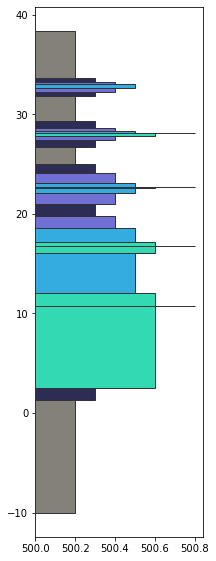

In [86]:
 column_number = 500
bed_facies, bed_bottom, bed_thickness, bed_colors = get_strat_column(beds, age, rsl, column_number, skip=10)
plot_column(bed_facies, bed_bottom, bed_thickness, bed_colors, left=column_number)
plt.gca().set_aspect(.05)

# Poisson-Gamma Age Models

<center><img style='height:65vh' src='images/bchron.png'></center>

**Poisson distribution** is a <span style='color:dodgerblue'>discrete</span> probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate $\lambda$ and are independent of the time since the last event.

<center><img style='height:45vh' src='images/Poisson_pmf.png' ></center>

**Exponential distribution** (a particular case of the of gamma distribution) is the probability distribution of the time between events in a *Poisson point process*

<center><img style='height:45vh' src='images/exponential_dist.png' ></center>

**Gamma distribution** if $\alpha$ is a positive integer is the sum of $\alpha$ independant exponentially distributed random variables with a mean of $\theta$.

<center><img style='height:45vh' src='images/Gammapdf.png' ></center>

Let's do a simple trial to check our intuition..

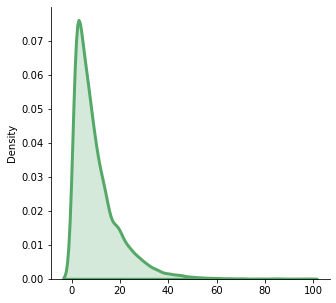

In [91]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
fig=plt.figure(figsize=(5,5))
a = np.random.uniform(0,1,100000)
b = a<0.1  ## 10 percent of the time
sns.kdeplot(np.diff(np.where(b)[0]),color=sns.color_palette('deep')[2],fill=True,lw=3) #time-lags
# c = np.random.exponential(10,100000) ## duration between events when average (lambda) is 10
# sns.kdeplot(c,color=sns.color_palette('deep')[1],fill=True,lw=3)
sns.despine()

# Deciding on number of sedimentation rate changes

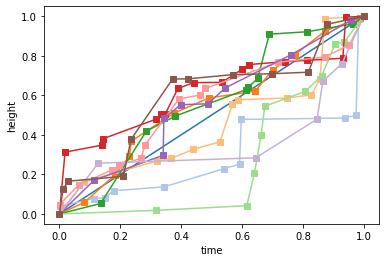

In [29]:
plt.plot([0,1],[0,1],'s-')
plt.gca().set_xlabel('time')
plt.gca().set_ylabel('height')
for i in range(10):
    pts=np.random.poisson(10) #discrete number of changes
    if pts>0:
        h_gaps=np.cumsum(np.random.gamma(1,1, pts))
        h_gaps=h_gaps/np.max(h_gaps)
        t_gaps=np.cumsum(np.random.gamma(1,1, pts))
        t_gaps=t_gaps/np.max(t_gaps)
        plt.plot([0,*t_gaps],[0,*h_gaps],'s-')



# What do the parameters of the gamma function do?

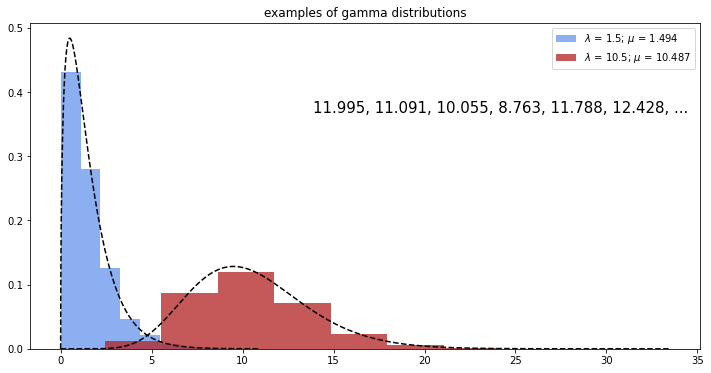

In [168]:
from scipy import stats
fig=plt.figure(1, figsize=(12,6)); ax=fig.add_subplot(111)
g_shape=1.5; g_loc=0; g_scale=1
gam_hist=np.random.gamma(g_shape,g_scale, 10000) #10K draws with shape = 1.5 and scale = 1
x=np.linspace(0,max(gam_hist),1000) 
gam=stats.gamma.pdf(x,g_shape,g_loc,g_scale) #continuous function
ax.hist(gam_hist,density=True,alpha=0.75,color='#6495ED', 
        label=r'$\lambda$ = %2.1f; $\mu$ = %2.3f' % (g_shape*g_scale,np.mean(gam_hist))); ax.plot(x,gam,'k--')
g_shape=10.5; g_loc=0; g_scale=1 #10K draws with shape = 10.5 and scale = 1
gam_hist=np.random.gamma(g_shape,g_scale, 10000)
x=np.linspace(0,max(gam_hist),1000); gam=stats.gamma.pdf(x,g_shape,g_loc,g_scale) #continuous function
ax.hist(gam_hist,density=True,alpha=0.75,color='#B22222',
        label=r'$\lambda$ = %2.1f; $\mu$ = %2.3f' % (g_shape*g_scale,np.mean(gam_hist))); ax.plot(x,gam,'k--')
#plot labels
ax.set_title('examples of gamma distributions')
ax.legend(); _=ax.text(0.99,0.725,', '.join(['%2.3f' %(g) for g in gam_hist[0:6].tolist()]) + ', ... ',
                       transform=ax.transAxes,horizontalalignment='right',fontsize=15)

# gamma distributions in sedimentology
<center>
    <div style='height:90vh;'>
	    <img src="./images/ribbon_rock2.png" style='height:90vh'>
    </div>
</center>

- gamma distributions are very common in sedimentology and stratigraphy
- this paper showed that the distribution of thicknesses of limestone mud beds followed a gamma distribution

# gamma distributions in sedimentology
<center>
    <div style='height:90vh;'>
	    <img src="./images/ribbon_rock_distros.png" style='height:90vh'>
    </div>
</center>

- logic is the same as what we are after
- have some path, with a start and a stop
    - randomly chop up that path
    - this mimics a Poisson process of building sediment in random increments
    - length of segments = gamma distribtion (exponential distribution)
- used as an argument AGAINST cyclcity (without using time series analysis)

# gamma distributions in sedimentology
<center>
    <div style='height:90vh;'>
	    <img src="./images/PAC_distros.png" style='height:90vh'>
    </div>
</center>

- what happens when we bundle couplets in another Poisson process?
- and bundling is itself a Poisson process
- get towards our red distributions - look more and more Gaussian

# Appendix: more on gamma distributions in sedimentology

In [80]:
#timesteps; probability of change; starting state
t=20000; prob=0.25; state=1
#minimum beds in a parasequence
min_couplet_num=3

#switch state
sed=np.array([state*-1 if np.random.random()<prob else state for i in range(t)])
#find the "on" periods
on=np.where(sed==1)[0]

#find indices of consecutive "on" periods
on_breaks=list(np.where(np.diff(on)!=1)[0]+1)

#group into pairs
on_breaks=[0]+on_breaks+[len(on)]
on_breaks=list(zip(on_breaks[0:-1],on_breaks[1:]))

#calculate lengths of "sediment on" period
on_time=[]
for o in on_breaks:
    on_time.append(len(on[o[0]:o[1]]))
    
#here, the "on" periods are used to bundle couplets
#--> value = number of couplets
on_time=np.cumsum(np.array(on_time)+min_couplet_num-1)
couplet_idx=list(zip(list(on_time[0:-1]),list(on_time[1:])))
couplet_idx=[tuple((0, couplet_idx[0][0]))]+couplet_idx
#generate thickess of those couplets
couplets=np.random.gamma(1,1, couplet_idx[-1][1])
#package them up
bundles=[np.sum(couplets[i[0]:i[1]]) for i in couplet_idx]

# Appendix: more on gamma distributions in sedimentology

In [81]:
#first hundred couplets for plotting
demo_couplets=list(np.cumsum(couplets)[0:100])
demo_couplets=[0]+demo_couplets
demo_couplets=list(zip(demo_couplets[0:-1],demo_couplets[1:]))
#make thickness vs. height boxes
couplet_boxes=[]
for d in demo_couplets:
    xy=np.array([(0,d[0]),(d[1]-d[0],d[0]),(d[1]-d[0],d[1]),(0,d[1])])
    rect = Polygon(xy,closed=True,facecolor="#"+''.join([np.random.choice([a for a in '0123456789ABCDEF']) for j in range(6)]))
    couplet_boxes.append(rect)
#bundles of couplets
demo_bundles=np.cumsum(bundles)[0:100]
demo_bundles=demo_bundles[demo_bundles<demo_couplets[-1][1]]

# Appendix: more on gamma distributions in sedimentology

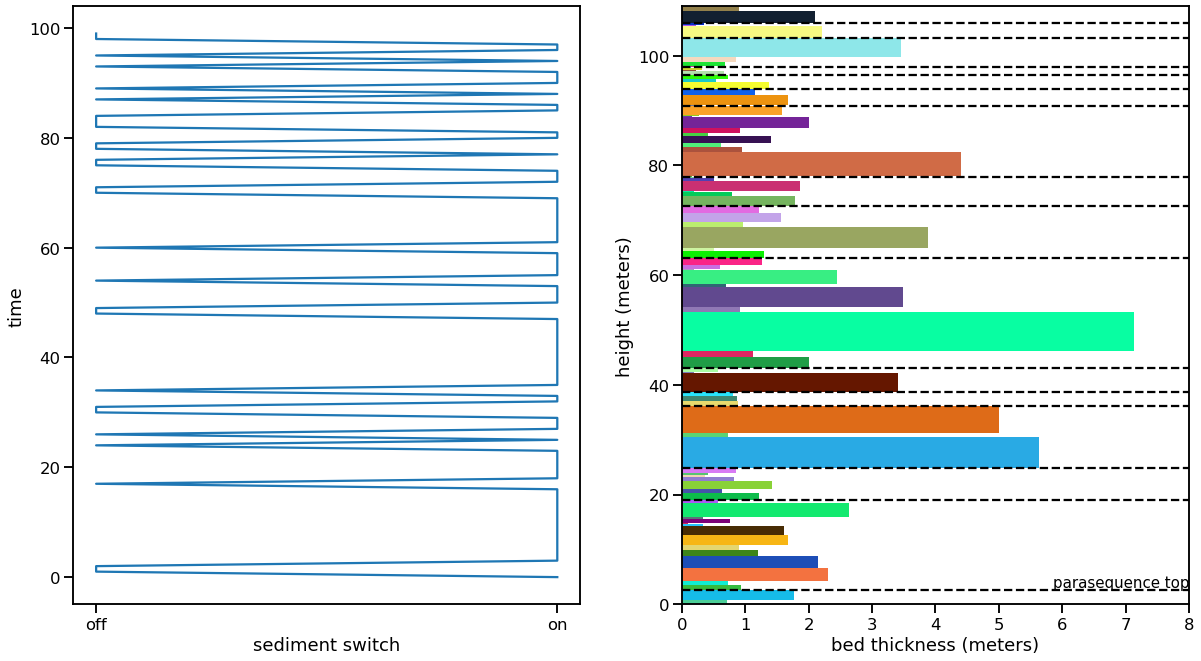

In [82]:
fig=plt.figure(1,figsize=(20,11)); ax=fig.add_subplot(121); ax.plot(sed[0:100],range(100)) #plot sedimentation history
ax.set_ylabel('time'); ax.set_xlabel('sediment switch'); ax.set_xticks([-1.0,1.0]); ax.set_xticklabels(['off','on'])
ax=fig.add_subplot(122); _=[ax.add_patch(r) for r in couplet_boxes] #plot bed thickness vs. height
ax.set_xlim([0,np.ceil(max(couplets[0:100]))]); ax.set_ylim([0,np.ceil(demo_couplets[-1][1])])
ax.set_ylabel('height (meters)');ax.set_xlabel('bed thickness (meters)')
_=[ax.plot(ax.get_xlim(),[d,d],'k--') for d in demo_bundles] #plot the parasequence boundaries
_=ax.text(ax.get_xlim()[1],demo_bundles[0],'parasequence top',horizontalalignment='right',verticalalignment='bottom',fontsize=15)

# Appendix: more on gamma distributions in sedimentology

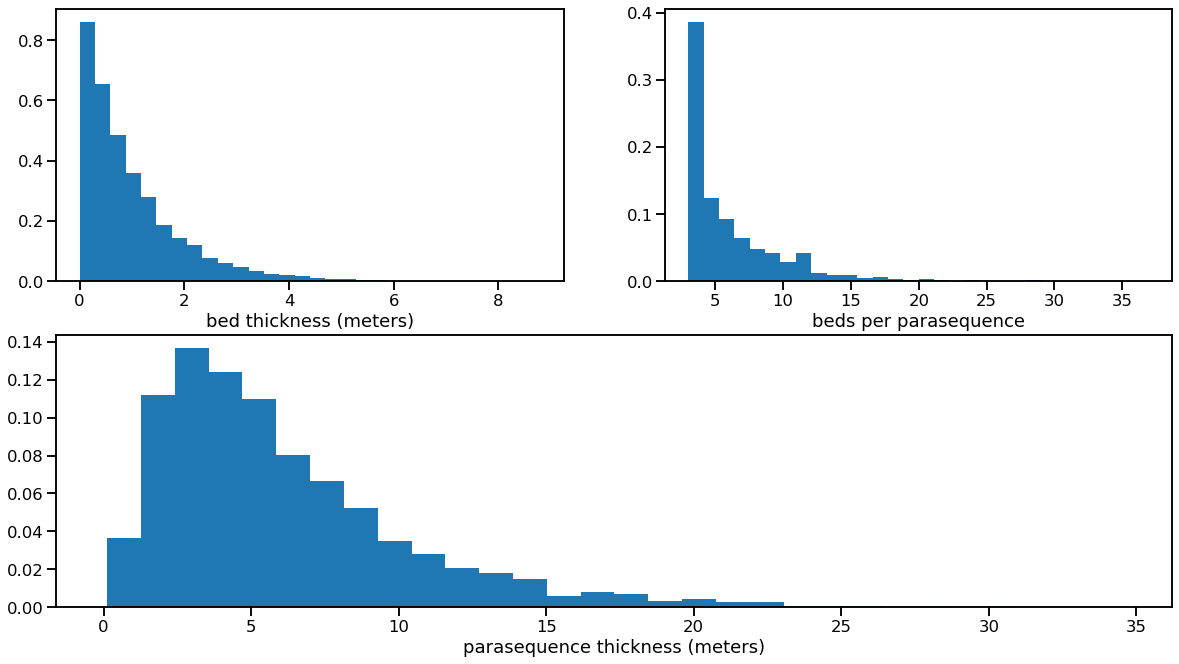

In [83]:
#histogram of bed thickness
fig=plt.figure(1,figsize=(20,11)); ax=fig.add_subplot(221)
ax.hist(couplets,bins=30,density=True); ax.set_xlabel('bed thickness (meters)')
#histogram of number of beds in a parasequence
ax=fig.add_subplot(222); ax.hist([i[1]-i[0] for i in couplet_idx],bins=30,density=True); ax.set_xlabel('beds per parasequence')
#histogram of parasequence thickness
ax=fig.add_subplot(212); ax.hist(bundles,bins=30,density=True);_=ax.set_xlabel('parasequence thickness (meters)')